In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2022-11-17'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415359
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515212
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526477
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422664
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410792


In [4]:
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-11,150.009995,144.369995,145.820007,149.699997,93903800.0,149.699997
2022-11-14,150.279999,147.429993,148.970001,148.279999,73374100.0,148.279999
2022-11-15,153.589996,148.559998,152.220001,150.039993,89868300.0,150.039993
2022-11-16,149.869995,147.289993,149.130005,148.789993,64170900.0,148.789993
2022-11-17,148.809998,146.270004,146.429993,148.148193,16965793.0,148.148193


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415359
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515212
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526477
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422664
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410792


In [6]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


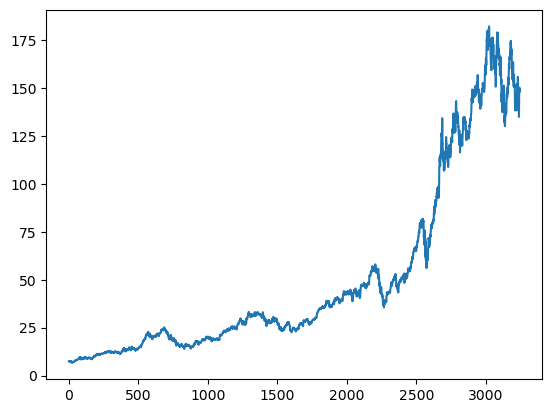

In [7]:
plt.plot(df.Close)

In [8]:
df


,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3239,150.009995,144.369995,145.820007,149.699997,93903800.0
3240,150.279999,147.429993,148.970001,148.279999,73374100.0
3241,153.589996,148.559998,152.220001,150.039993,89868300.0
3242,149.869995,147.289993,149.130005,148.789993,64170900.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3239    152.078900
3240    152.179000
3241    152.262800
3242    152.334099
3243    152.441181
Name: Close, Length: 3244, dtype: float64

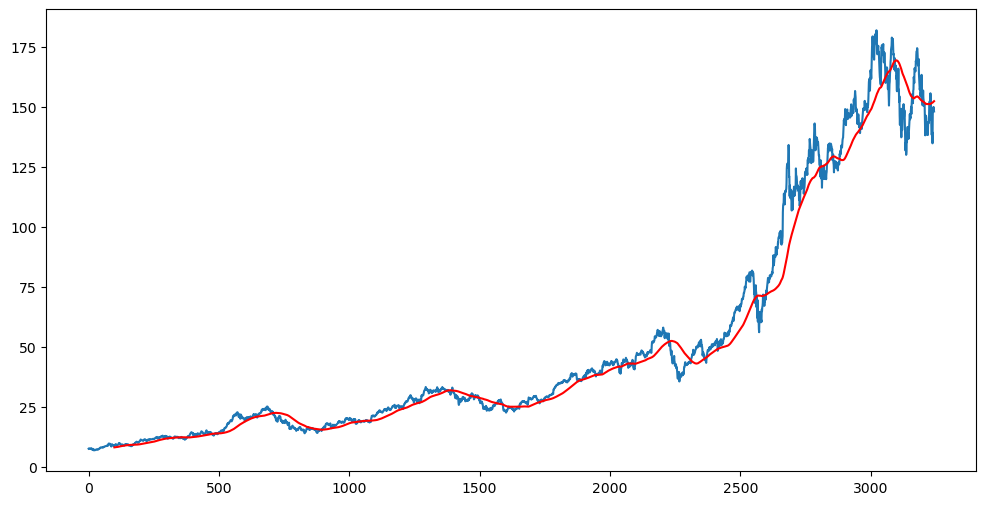

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3239    155.680800
3240    155.570550
3241    155.446850
3242    155.317750
3243    155.179291
Name: Close, Length: 3244, dtype: float64

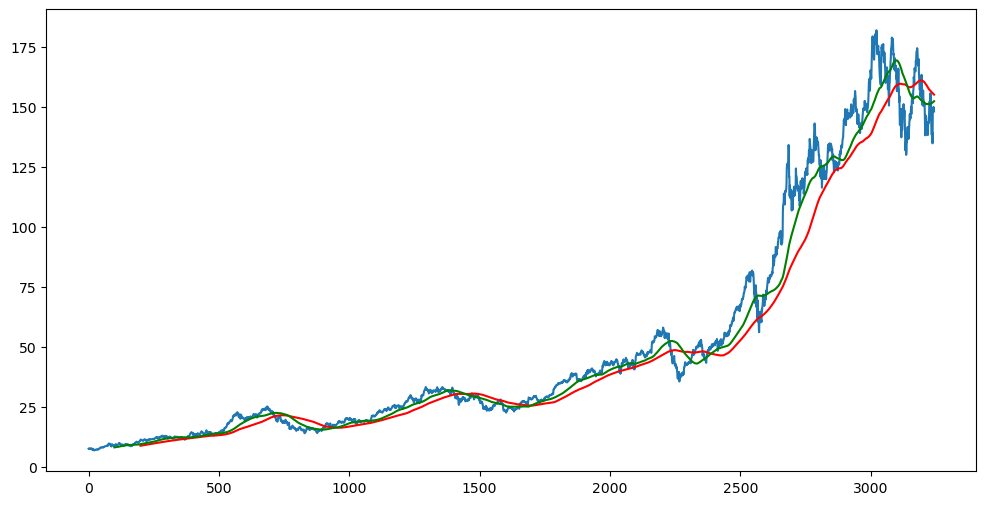

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma200,'r')
plt.plot(ma100,'g')


In [12]:
# Splitting the data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print (data_training. shape)
print (data_testing. shape)

(2270, 1)
(974, 1)


In [13]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [14]:
data_testing.head()

,Close
2270,38.327499
2271,38.450001
2272,38.072498
2273,37.500000
2274,38.267502


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01304067],
       [0.01533047],
       [0.01558878],
       ...,
       [0.59044004],
       [0.58882739],
       [0.60260811]])

In [17]:
x_train = []
y_train = []
for i in range(100 , data_training_array.shape[0]):
        x_train.append(data_training_array[i-100: i])
        y_train.append(data_training_array[i, 0])

x_train , y_train = np.array(x_train),np.array(y_train)

In [18]:
x_train.shape

(2170, 100, 1)

In [19]:
# DL MODEL

from keras.layers import Dropout , Dense , LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1 )))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu', return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu', return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train , y_train, epochs = 50)

Epoch 1/50
68/68 [==============================] - 34s 373ms/step - loss: 0.0300
Epoch 2/50
68/68 [==============================] - 24s 357ms/step - loss: 0.0061
Epoch 3/50
68/68 [==============================] - 25s 373ms/step - loss: 0.0053
Epoch 4/50
68/68 [==============================] - 24s 353ms/step - loss: 0.0051
Epoch 5/50
68/68 [==============================] - 23s 339ms/step - loss: 0.0044
Epoch 6/50
68/68 [==============================] - 24s 351ms/step - loss: 0.0041
Epoch 7/50
68/68 [==============================] - 23s 343ms/step - loss: 0.0040
Epoch 8/50
68/68 [==============================] - 23s 338ms/step - loss: 0.0034
Epoch 9/50
68/68 [==============================] - 23s 332ms/step - loss: 0.0035
Epoch 10/50
68/68 [==============================] - 23s 332ms/step - loss: 0.0039
Epoch 11/50
68/68 [==============================] - 23s 336ms/step - loss: 0.0032
Epoch 12/50
68/68 [==============================] - 23s 336ms/step - loss: 0.0035
Epoch 13/50
6

In [23]:
model.save('keras_model.h5')

In [24]:
data_testing.head()

,Close
2270,38.327499
2271,38.450001
2272,38.072498
2273,37.500000
2274,38.267502


In [25]:
data_training.tail(100)

,Close
2170,52.560001
2171,53.330002
2172,54.395000
2173,53.865002
2174,53.759998
...,...
2265,39.480000
2266,35.547501
2267,37.064999
2268,36.982498


In [26]:
past_100_days = data_training.tail(100)

In [27]:
final_df = past_100_days.append(data_testing, ignore_index = True) 

C:\Users\choud\AppData\Local\Temp\ipykernel_38996\3396828662.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [28]:
final_df.head()

,Close
0,52.560001
1,53.330002
2,54.395000
3,53.865002
4,53.759998


In [29]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.11615602],
       [0.12141334],
       [0.12868482],
       ...,
       [0.78171885],
       [0.77318424],
       [0.76880224]])

In [30]:
input_data.shape

(1074, 1)

In [31]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(974, 100, 1)
(974,)


In [33]:
# MAKING PREDICTIONS

y_predicted = model.predict(x_test)

In [34]:
y_predicted.shape

(974, 1)

In [43]:
y_test

array([0.03975419, 0.03712555, 0.0407613 , 0.03191943, 0.02498933,
       0.0145771 , 0.00792012, 0.02556968, 0.02382861, 0.02396517,
       0.02654264, 0.02684987, 0.        , 0.010361  , 0.00979771,
       0.01461125, 0.01898096, 0.01981736, 0.01723989, 0.01333105,
       0.01857132, 0.02176325, 0.02333362, 0.02497227, 0.0189639 ,
       0.02002218, 0.01793974, 0.02657676, 0.02408467, 0.02131943,
       0.03936161, 0.04139285, 0.04152941, 0.04960314, 0.05460441,
       0.05470684, 0.049074  , 0.04816933, 0.04649653, 0.04898865,
       0.04777672, 0.04883503, 0.04818639, 0.04905691, 0.05093454,
       0.04927882, 0.05253905, 0.05468976, 0.05486046, 0.05578219,
       0.05284628, 0.05595289, 0.05745499, 0.05690876, 0.05518478,
       0.05173679, 0.05243663, 0.06266108, 0.06609201, 0.06745755,
       0.07090551, 0.07498506, 0.07822822, 0.0756849 , 0.07846719,
       0.09029614, 0.08340019, 0.07945721, 0.07612869, 0.07899633,
       0.07942306, 0.08152257, 0.08372451, 0.08846975, 0.09073

In [44]:
y_predicted

array([[0.14065441],
       [0.13932884],
       [0.13803217],
       [0.13675997],
       [0.13549542],
       [0.13420863],
       [0.13285837],
       [0.13140534],
       [0.12986985],
       [0.12829553],
       [0.12673089],
       [0.12522912],
       [0.12383848],
       [0.12253307],
       [0.1212879 ],
       [0.12009409],
       [0.1189591 ],
       [0.11790778],
       [0.11696704],
       [0.11615072],
       [0.11545311],
       [0.11487043],
       [0.11440785],
       [0.11407064],
       [0.11386204],
       [0.11376582],
       [0.11375543],
       [0.11380187],
       [0.11389434],
       [0.11402839],
       [0.1141886 ],
       [0.11439741],
       [0.11469758],
       [0.11511728],
       [0.11568631],
       [0.11643663],
       [0.11738291],
       [0.11850308],
       [0.11974946],
       [0.12106143],
       [0.12238333],
       [0.12366477],
       [0.12486574],
       [0.125956  ],
       [0.12691721],
       [0.12774673],
       [0.12844697],
       [0.129

In [35]:
scaler.scale_

array([0.00682769])

In [36]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

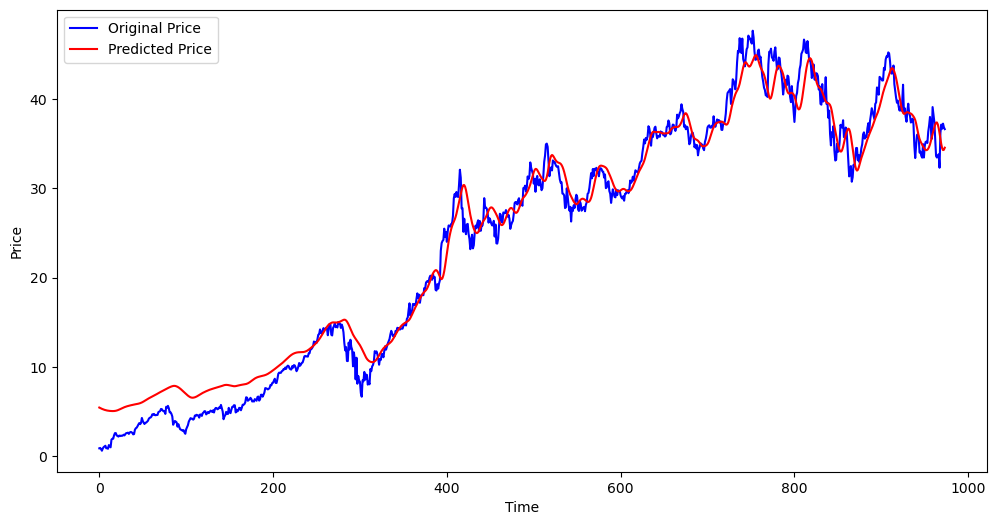

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test ,'b' , label = 'Original Price')
plt.plot(y_predicted ,'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [56]:
offset=y_predicted-y_test
offset



array([[  4.56179432,   4.52195654,   4.64472136, ..., -31.76741341,
        -31.36091   , -31.15219492],
       [  4.51035503,   4.47051725,   4.59328208, ..., -31.8188527 ,
        -31.41234929, -31.2036342 ],
       [  4.46198181,   4.42214403,   4.54490886, ..., -31.86722592,
        -31.46072251, -31.25200742],
       ...,
       [ 33.36945442,  33.32961664,  33.45238147, ...,  -2.95975331,
         -2.5532499 ,  -2.34453481],
       [ 33.39860252,  33.35876474,  33.48152957, ...,  -2.93060521,
         -2.5241018 ,  -2.31538671],
       [ 33.63889793,  33.59906015,  33.72182498, ...,  -2.6903098 ,
         -2.28380639,  -2.0750913 ]])

In [57]:
error_percentage = np.mean(np.abs((y_test - y_predicted)/y_test))*100
error_percentage - 100

80.40459363242147